# LFSR for 16-bit Galois LFSR

In [33]:
class LFSR:
    def __init__(self, seed, tap):
        self.state = seed
        self.tap = tap

    def step(self):
        lsb = self.state & 1
        self.state >>= 1
        if lsb:
            self.state ^= self.tap
        return self.state

    def run(self, steps):
        return [self.step() for _ in range(steps)]

# Example usage
seed = 0xACE1  # Initial seed
tap = 0xD008  # Tap position for 16-bit LFSR
lfsr = LFSR(seed, tap)
output = lfsr.run(10)  # Generate 10 steps
print(output)

[34424, 17212, 8606, 4303, 55407, 48191, 36375, 38659, 39817, 40396]


In [34]:
# Python code to find the period of a stream of 16-bit numbers
def find_period(stream):
    for period in range(1, len(stream) // 2):
        if stream[:period] == stream[period:2 * period]:
            return period
    return None

In [35]:
lfsr = LFSR(0xACE1, 0xD008)
output = lfsr.run(4 * 2 ** 16)
period = find_period(output)
print(period)

65535


In [36]:
trunc_output = [output[x] & 0xFF for x in output]
period = find_period(trunc_output)
print(period)

65535


In [37]:
folded_output = [((output[x] & 0xFF) + (output[x] >> 8) & 0xFF) for x in output]
period = find_period(folded_output)
print(period)

65535


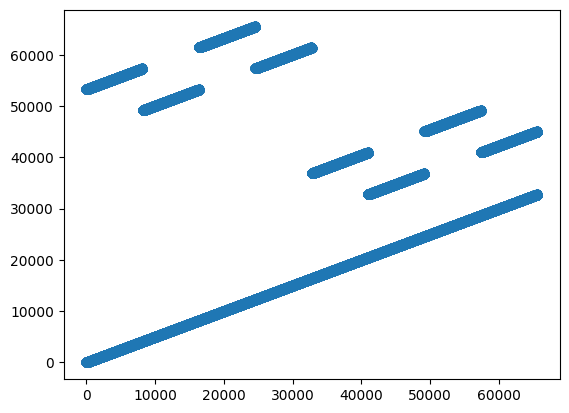

In [38]:
# Import Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#from scipy import stats as sc 

# Create a Lag plot of output
lag = 1
plt.scatter(output[:-lag], output[lag:])
plt.show()



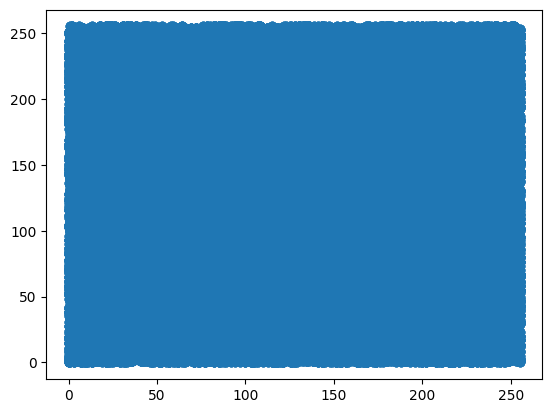

In [61]:
# Create a Lag plot of trunc_output
lag = 1
plt.scatter(trunc_output[:-lag], trunc_output[lag:])
plt.show()

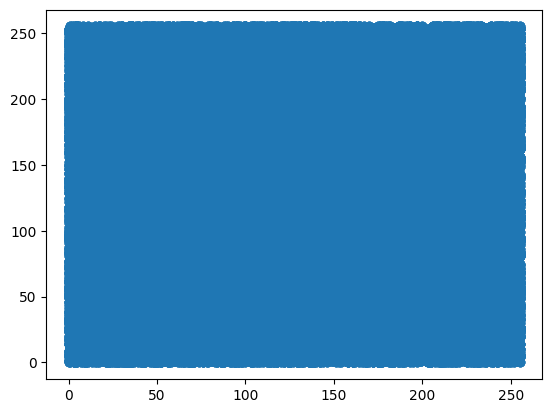

In [40]:
# Create a Lag plot of folded_output
lag = 1
plt.scatter(folded_output[:-lag], folded_output[lag:])
plt.show()

255


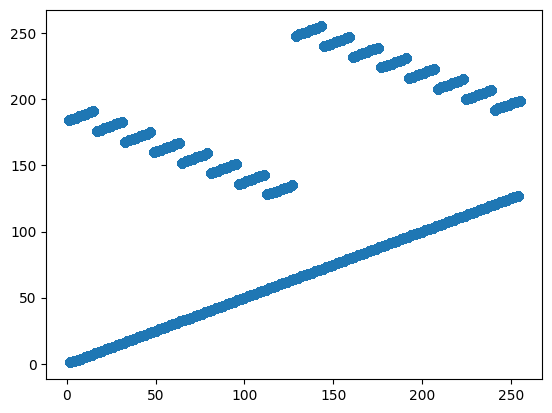

In [41]:
## 8-bit LFSR

# Example usage
seed = 0xAC  # Initial seed
tap = 0xB8  # Tap position for 8-bit LFSR
lfsr8 = LFSR(seed, tap)

output_lfsr8 = lfsr8.run(4 * 2 ** 16)
period = find_period(output_lfsr8)
print(period)

lag = 1
plt.scatter(output_lfsr8[:-lag], output_lfsr8[lag:])
plt.show()

In [ ]:
import numpy as np
from collections import Counter

def calculate_entropy(data):
    """
    Calculate the Shannon entropy of an array of 8-bit numbers.
    :param data: List or NumPy array of 8-bit numbers (0-255)
    :return: Entropy value in bits
    """
    if len(data) == 0:
        return 0.0  # Avoid log(0) error

    # Count occurrences of each byte value
    counts = Counter(data)
    total = len(data)

    # Compute entropy
    entropy = -sum((count / total) * np.log2(count / total) for count in counts.values())

    return entropy

# Example usage
entropy_value = calculate_entropy(output_lfsr8)
print(f"8 bit LFSR Entropy: {entropy_value:.4f} bits")

entropy_value = calculate_entropy(trunc_output)
print(f"Truncated 16-bit LFSR Entropy: {entropy_value:.4f} bits")

entropy_value = calculate_entropy(folded_output)
print(f"Folded 16-bit LFSR Entropy: {entropy_value:.4f} bits")


8 bit LFSR Entropy: 7.9944 bits
Truncated 16-bit LFSR Entropy: 8.0000 bits
Folded 16-bit LFSR Entropy: 8.0000 bits


Text(0.5, 1.0, 'Add upper and lower 8-bits of a 16-bit LFSR')

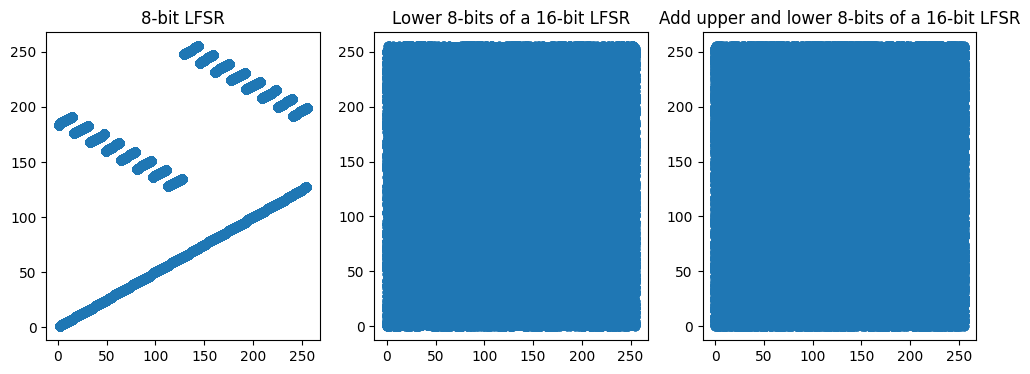

In [50]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].scatter(output_lfsr8[:-lag], output_lfsr8[lag:])
axs[0].set_title("8-bit LFSR")
axs[1].scatter(trunc_output[:-lag], trunc_output[lag:])
axs[1].set_title("Lower 8-bits of a 16-bit LFSR")
axs[2].scatter(folded_output[:-lag], folded_output[lag:])
axs[2].set_title("Add upper and lower 8-bits of a 16-bit LFSR")
